#### Data engineering
#### Dataset: Epilepsy
#### Author: Edgar Acuna
#### Created: April 2, 2025

In [2]:
# imports
import numpy as np
from numpy import mean
from numpy import std, unique
from numpy import dstack
from pandas import read_csv
from matplotlib import pyplot
 

In [3]:
import pandas as pd
from aeon.datasets import load_classification
from sklearn import preprocessing


def load_data(dataset, split="Train"):
    if split=="Train":
        X, y= load_classification(dataset, split="Train")
    else:
        X, y = load_classification(dataset, split="Test")
    print(" Shape of X = ", X.shape)
    print(" Shape of y = ", y.shape)
    #Swap dimensions so features are the third dimension
    X = X.swapaxes(1, 2)
    print(" New shape of X = ", X.shape)
    #prepare y
    y = pd.DataFrame(y)
    enc = preprocessing.OneHotEncoder(dtype=int)
    enc.fit(y)
    y = enc.transform(y).toarray()
    print(" New shape of y = ", y.shape)
    return X, y


### Training dataset

In [5]:
# loading Training data
X, y = load_data("Epilepsy",split="Train")

 Shape of X =  (137, 3, 206)
 Shape of y =  (137,)
 New shape of X =  (137, 206, 3)
 New shape of y =  (137, 4)


In [6]:
#Classes size in training
import numpy as np
np.sum(y,axis=0)

array([34, 36, 30, 37])

In [7]:
#Obtatining the class labels
yo=np.argmax(y,axis=1)
yo=np.array(yo,dtype=int)
#print(yo)

In [8]:
#Extracting the time series by class
X1=X[yo==0]
X2=X[yo==1]
X3=X[yo==2]
X4=X[yo==3]
print(X3.shape)

(30, 206, 3)


In [9]:
#Calculating the means of the channels in each group
Xa1=X1.mean(axis=0).T
Xa1=pd.DataFrame(Xa1)
Xa2=X2.mean(axis=0).T
Xa2=pd.DataFrame(Xa2)
Xa3=X3.mean(axis=0).T
Xa3=pd.DataFrame(Xa3)
Xa4=X4.mean(axis=0).T
Xa4=pd.DataFrame(Xa4)
print(Xa2.shape)

(3, 206)


### Plotting the vector of means of the channesl in each group

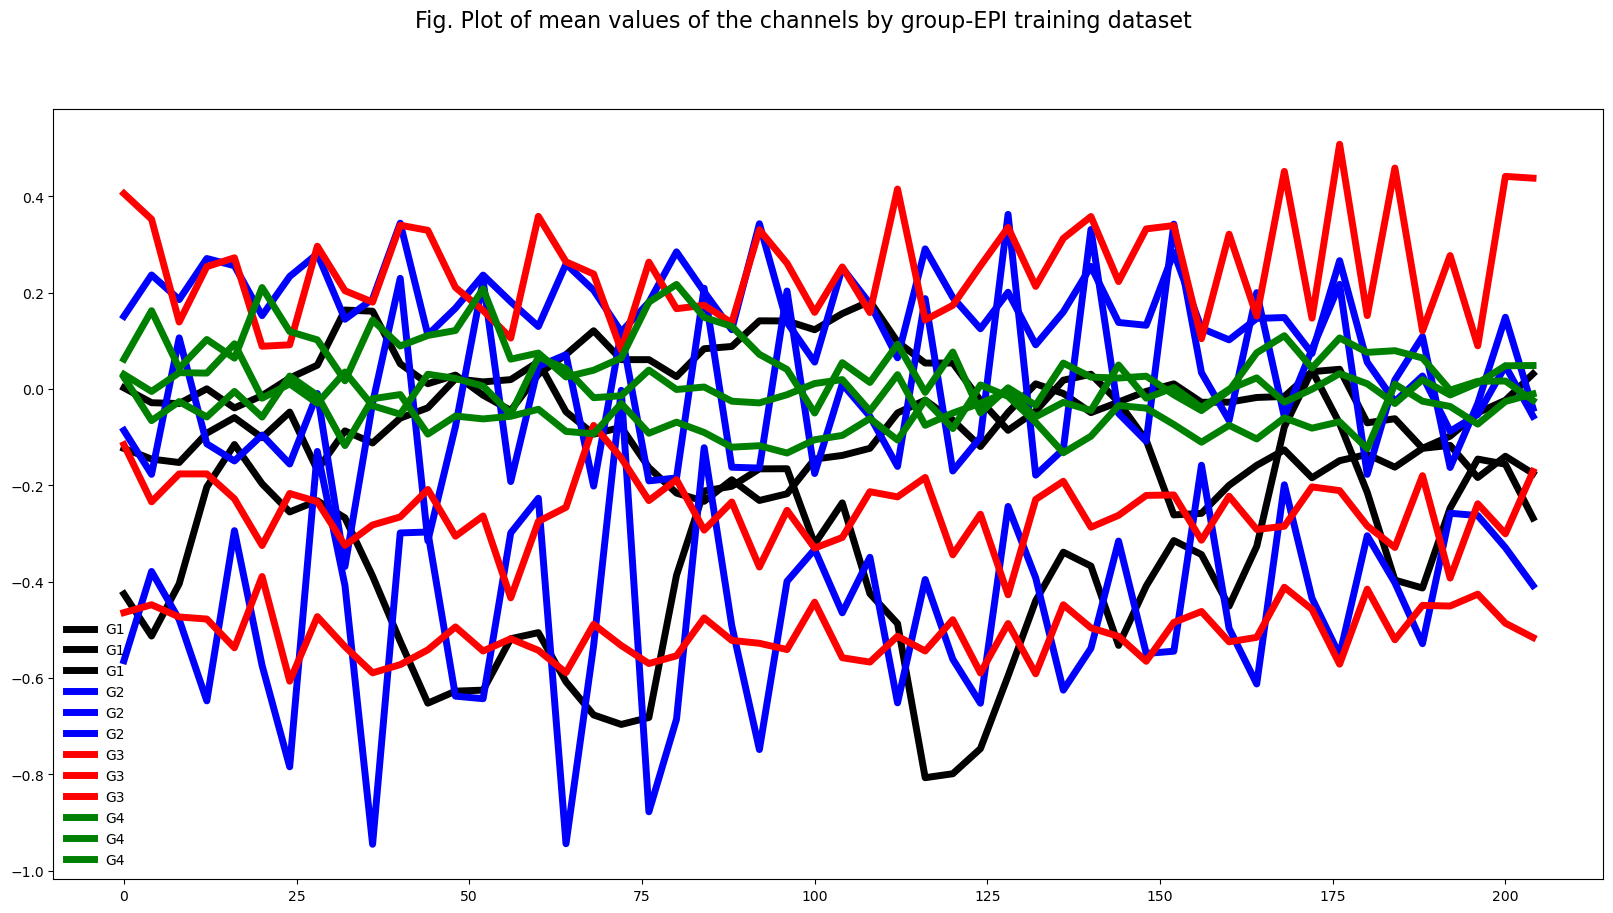

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
ejex=np.arange(0,206,4)
fig.suptitle("Fig. Plot of mean values of the channels by group-EPI training dataset",fontsize=16)
ax.plot(ejex, Xa1.iloc[0,ejex], color='black',lw=5, label='G1')
ax.plot(ejex,Xa1.iloc[1,ejex], color='black', lw=5,  label='G1')
ax.plot(ejex, Xa1.iloc[2,ejex], color='black', lw=5, label='G1')
ax.plot(ejex, Xa2.iloc[0,ejex], color='blue',lw=5, label='G2')
ax.plot(ejex,Xa2.iloc[1,ejex], color='blue', lw=5,   label='G2')
ax.plot(ejex, Xa2.iloc[2,ejex], color='blue', lw=5, label='G2')
ax.plot(ejex, Xa3.iloc[0,ejex], color='red',lw=5, label='G3')
ax.plot(ejex,Xa3.iloc[1,ejex], color='red', lw=5,  label='G3')
ax.plot(ejex, Xa3.iloc[2,ejex], color='red', lw=5, label='G3')
ax.plot(ejex, Xa4.iloc[0,ejex], color='green',lw=5, label='G4')
ax.plot(ejex,Xa4.iloc[1,ejex], color='green', lw=5,  label='G4')
ax.plot(ejex, Xa4.iloc[2,ejex], color='green', lw=5,  label='G4')
ax.legend(loc='best', frameon=False)
plt.show()

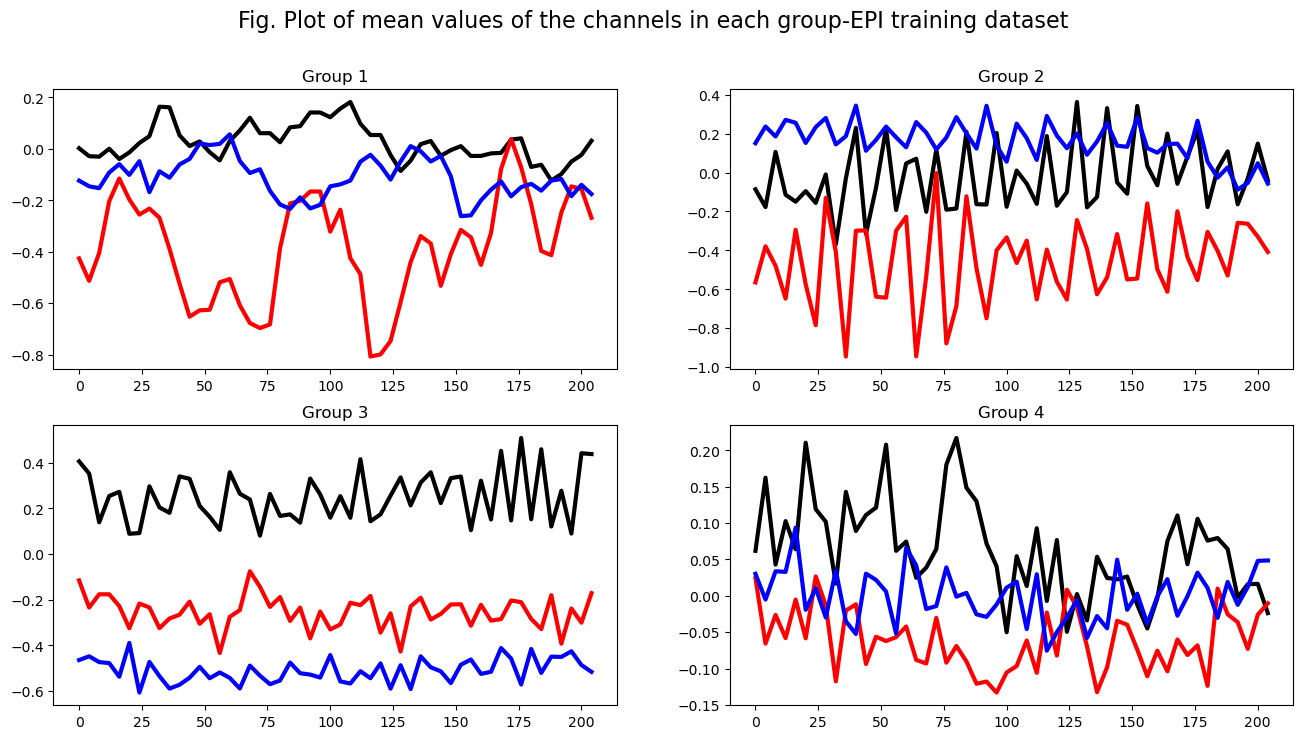

In [12]:
fig, axs = plt.subplots(2, 2,figsize=(16,8))
fig.suptitle("Fig. Plot of mean values of the channels in each group-EPI training dataset",fontsize=16)
axs[0,0].plot(ejex, Xa1.iloc[0,ejex], color='black',lw=3, label='G1')
axs[0,0].plot(ejex,Xa1.iloc[1,ejex], color='red', lw=3,  label='G1')
axs[0,0].plot(ejex, Xa1.iloc[2,ejex], color='blue', lw=3, label='G1')
axs[0,0].set_title("Group 1")
axs[0,1].plot(ejex, Xa2.iloc[0,ejex], color='black',lw=3, label='G2')
axs[0,1].plot(ejex,Xa2.iloc[1,ejex], color='red', lw=3,   label='G2')
axs[0,1].plot(ejex, Xa2.iloc[2,ejex], color='blue', lw=3, label='G2')
axs[0,1].set_title("Group 2")
axs[1,0].plot(ejex, Xa3.iloc[0,ejex], color='black',lw=3, label='G3')
axs[1,0].plot(ejex,Xa3.iloc[1,ejex], color='red', lw=3,  label='G3')
axs[1,0].plot(ejex, Xa3.iloc[2,ejex], color='blue', lw=3, label='G3')
axs[1,0].set_title("Group 3")
axs[1,1].plot(ejex, Xa4.iloc[0,ejex], color='black',lw=3, label='G4')
axs[1,1].plot(ejex,Xa4.iloc[1,ejex], color='red', lw=3,  label='G4')
axs[1,1].plot(ejex, Xa4.iloc[2,ejex], color='blue', lw=3,  label='G4')
axs[1,1].set_title("Group 4")
#ax.legend(loc='best', frameon=False)
plt.show()
# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

In [13]:
#Computing the variance of the training dataset
X.var(axis=0).sum()/(206*3)

0.7432985025918073

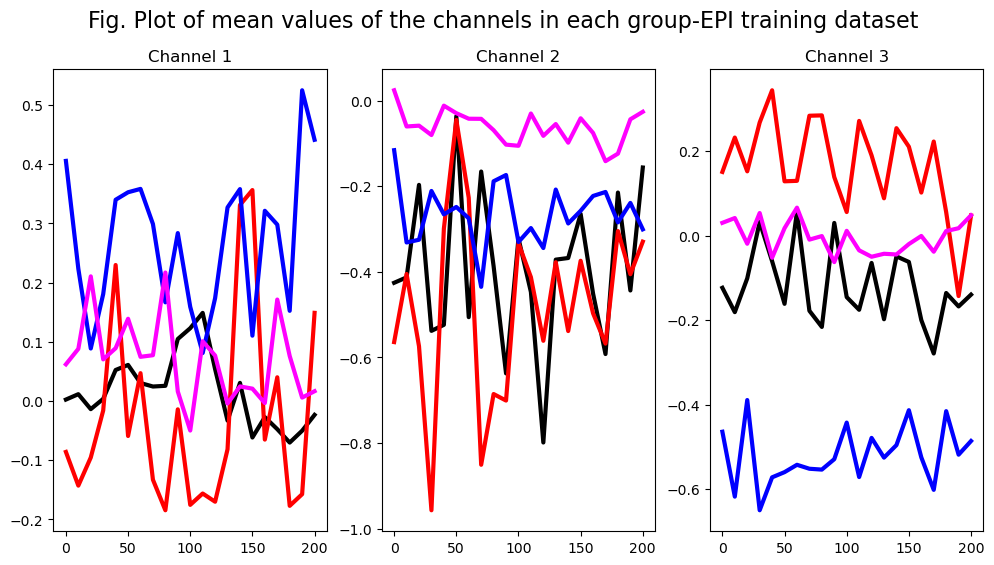

In [14]:
fig, axs = plt.subplots(1, 3,figsize=(12,6))
ejex=np.arange(0,206,10)
fig.suptitle("Fig. Plot of mean values of the channels in each group-EPI training dataset",fontsize=16)
axs[0].plot(ejex, Xa1.iloc[0,ejex], color='black',lw=3, label='G1')
axs[0].plot(ejex,Xa2.iloc[0,ejex], color='red', lw=3,  label='G1')
axs[0].plot(ejex, Xa3.iloc[0,ejex], color='blue', lw=3, label='G1')
axs[0].plot(ejex, Xa4.iloc[0,ejex], color='magenta', lw=3,  label='G4')
axs[0].set_title("Channel 1")
axs[1].plot(ejex, Xa1.iloc[1,ejex], color='black',lw=3, label='G2')
axs[1].plot(ejex,Xa2.iloc[1,ejex], color='red', lw=3,   label='G2')
axs[1].plot(ejex, Xa3.iloc[1,ejex], color='blue', lw=3, label='G2')
axs[1].plot(ejex, Xa4.iloc[1,ejex], color='magenta', lw=3,  label='G4')
axs[1].set_title("Channel 2")
axs[2].plot(ejex, Xa1.iloc[2,ejex], color='black',lw=3, label='G3')
axs[2].plot(ejex,Xa2.iloc[2,ejex], color='red', lw=3,  label='G3')
axs[2].plot(ejex, Xa3.iloc[2,ejex], color='blue', lw=3, label='G3')
axs[2].plot(ejex, Xa4.iloc[2,ejex], color='magenta', lw=3,  label='G4')
axs[2].set_title("Channel 3")
#ax.legend(loc='best', frameon=False)
plt.show()
# Hide x labels and tick labels for top plots and y ticks for right plots.
#for ax in axs.flat:
#    ax.label_outer()

### Plot of  mean values  of all time series in each time-step by group

In [16]:
tempoA=X.reshape(X.shape[1],-1).T
print(tempoA.shape)

(411, 206)


In [17]:
tempoB=pd.DataFrame(tempoA)
from itertools import cycle
variables= cycle(yo)
print(variables)
tempoB['group'] = [next(variables) for variable in range(len(tempoB))]
#Bboxplot  of features by class
a=tempoB.groupby('group').mean()
a.shape

(4, 206)

In [18]:
tempoB.shape

(411, 207)

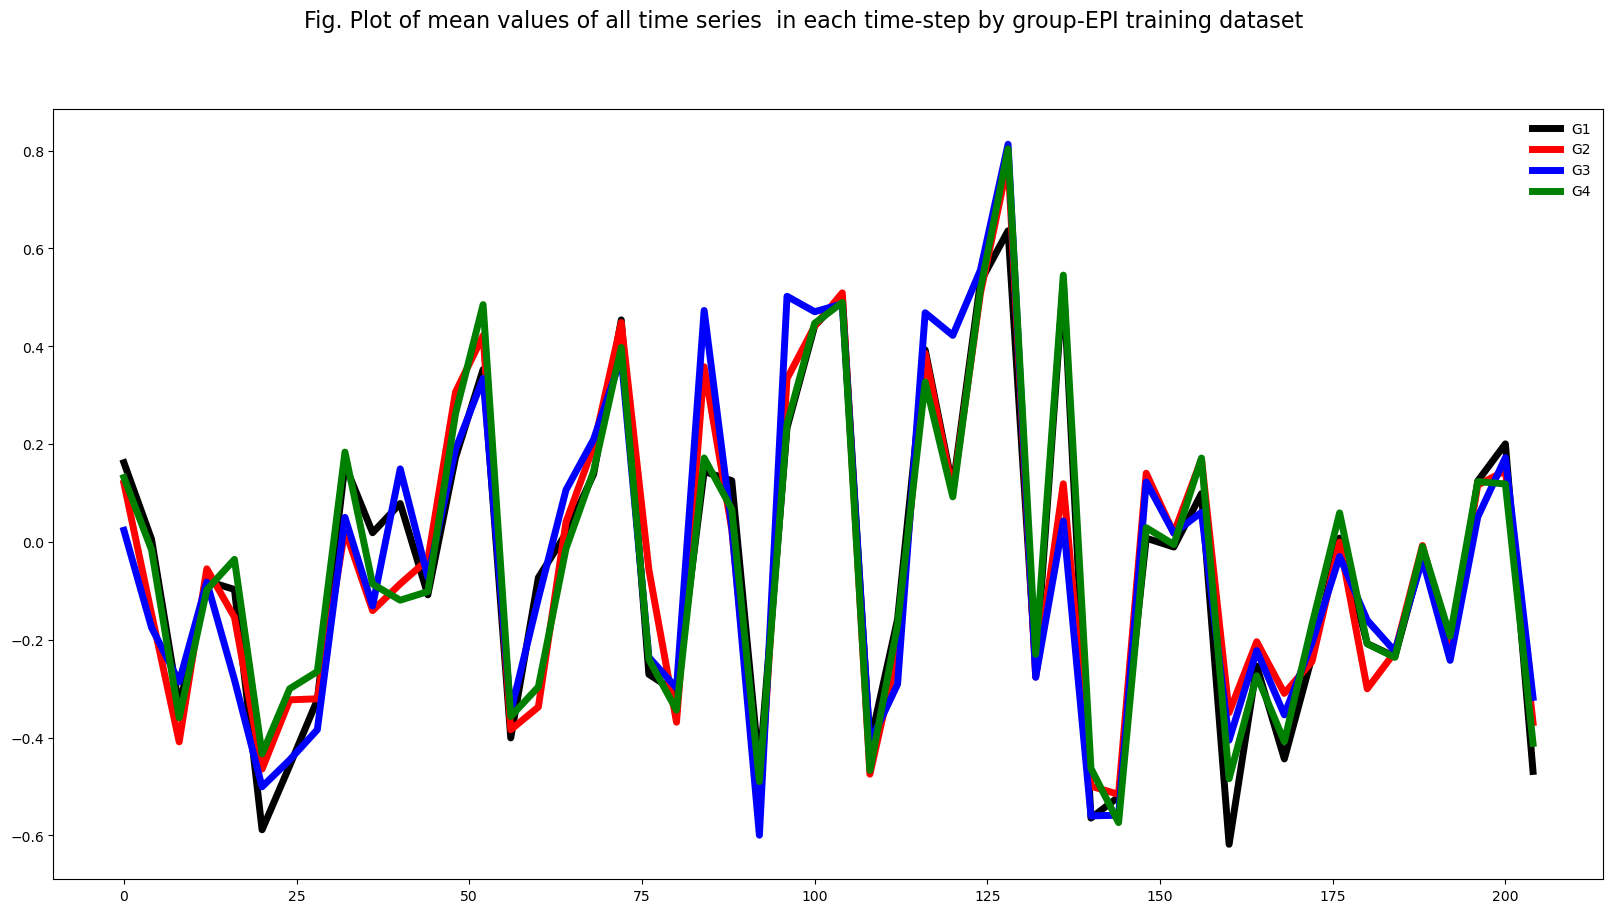

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,10))
ejex=np.arange(0,206,4)
fig.suptitle("Fig. Plot of mean values of all time series  in each time-step by group-EPI training dataset",fontsize=16)
ax.plot(ejex, a.iloc[0,ejex], color='black',lw=5,label='G1')
ax.plot(ejex,a.iloc[1,ejex], color='red', lw=5, label='G2')
ax.plot(ejex, a.iloc[2,ejex], color='blue', lw=5, label='G3')
ax.plot(ejex, a.iloc[3,ejex], color='green', lw=5, label='G4')
ax.legend(loc='best', frameon=False)
plt.show()

### Distances between groups in the training set

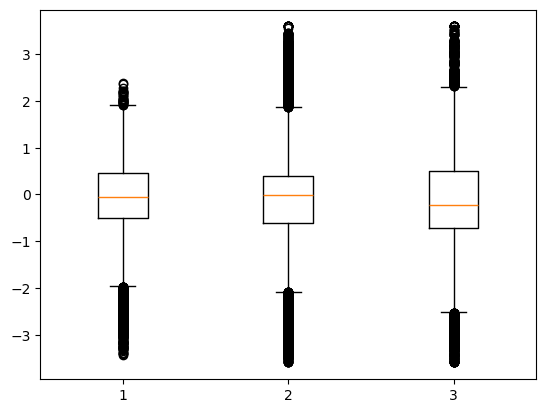

In [21]:
#Boxplots of the features in the training set 
np.sum(y,axis=0)
tempotr=X.reshape(X.shape[2],-1).T
tempotr=pd.DataFrame(tempotr)
pyplot.boxplot(tempotr)
pyplot.show()

In [22]:
#Boxplots of each feature inthe groups pf the training dataset
temptr=pd.DataFrame(tempotr)
from itertools import cycle
variables= cycle(yo)
print(variables)
temptr['group'] = [next(variables) for variable in range(len(temptr))]
#Bboxplot  of features by class
temptr.boxplot(by='group')

array([[<Axes: title={'center': '0'}, xlabel='[group]'>,
        <Axes: title={'center': '1'}, xlabel='[group]'>],
       [<Axes: title={'center': '2'}, xlabel='[group]'>, <Axes: >]],
      dtype=object)

In [23]:
#Distance between the features in the two groups of the treining
means=temptr.groupby('group').mean()
from scipy.spatial.distance import pdist, squareform
distances = pdist(means, metric='euclidean')
distances

array([0.02395253, 0.00826573, 0.02005644, 0.02338905, 0.01301179,
       0.02289718])

In [24]:
distances.max()

0.02395252652328051

In [25]:
#media total training
meanTr=tempoA.mean(axis=0)
meanTr.shape

(206,)

(28222, 3)


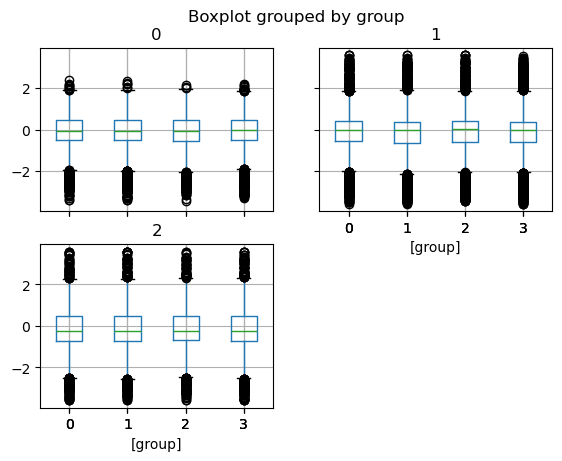

In [26]:
#Boxplots of dimensions in the training dataset
tempotr=X.reshape(X.shape[2],-1).T
tempodftr=pd.DataFrame(tempotr)
print(tempodftr.shape)
pyplot.boxplot(tempodftr)
pyplot.show()

### Boxplots of channels in each group of the training dataset

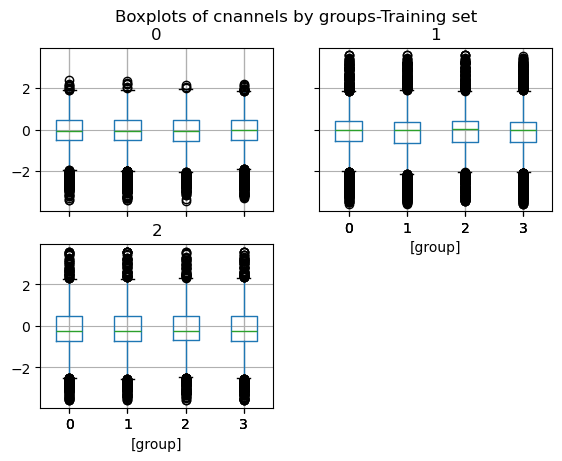

In [28]:
#Boxplots of dimensions in each group of the training dataset
temptr=pd.DataFrame(tempotr)
from itertools import cycle
variables= cycle(yo)
print(variables)
temptr['group'] = [next(variables) for variable in range(len(temptr))]
#Bboxplot  of features by class
#temptr.boxplot(by='group')
axes = temptr.boxplot(by='group')
plt.title('')
plt.suptitle('Boxplots of cnannels by groups-Training set')
axes = plt.show()

In [29]:
#Computing the mean of dimensions in each group of the training dataset
temptr.groupby('group').mean()

,0,1,2
group,,,
0,-0.069589,-0.079063,-0.165855
1,-0.073794,-0.102226,-0.161437
2,-0.073791,-0.078994,-0.158738
3,-0.062154,-0.097674,-0.165055


### Feature selection 

In [31]:
#Mutual information criterion
from sklearn.feature_selection import  mutual_info_classif, SelectPercentile, f_classif
ym=tempoB['group']
Xm=tempoB.iloc[:,0:206]
scores1 = mutual_info_classif(Xm,ym)
#scores /= scores.max()
importance1=[i for i,v in enumerate(scores1) if v > .1]
len(importance1)*100/206

9.223300970873787

In [32]:
#Using p-avlues of the the F-test 
selector = SelectPercentile(f_classif, percentile=30)
Xm_new=selector.fit_transform(Xm, ym)
scores = -np.log10(selector.pvalues_)
#scores /= scores.max()
#print(scores)
#critical p-value=.15
importance=[i for i,v in enumerate(scores) if v > .8239]
len(importance)*100/206

19.41747572815534

In [33]:
Xm_new.shape

(411, 62)

### Testing dataset

In [35]:
# loading Testing data
Xt, yt = load_data("Epilepsy",split="Test")

 Shape of X =  (138, 3, 206)
 Shape of y =  (138,)
 New shape of X =  (138, 206, 3)
 New shape of y =  (138, 4)


(28428, 3)


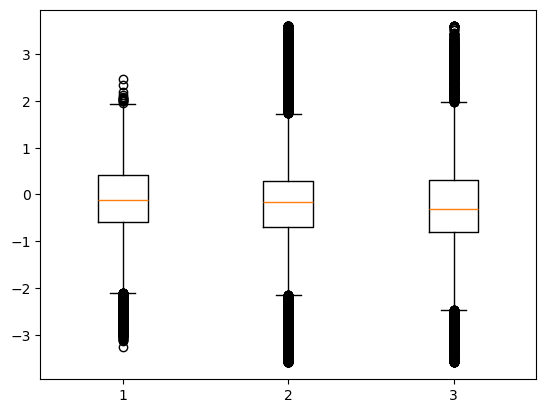

In [36]:
#Boxplots of the dimensions  in the testing dataset
tempote=Xt.reshape(Xt.shape[2],-1).T
tempodfte=pd.DataFrame(tempote)
print(tempodfte.shape)
pyplot.boxplot(tempodfte)
pyplot.show()

In [37]:
#Classes size test data
import numpy as np
np.sum(yt,axis=0)

array([34, 37, 30, 37])

In [38]:
yto=np.argmax(yt,axis=1)
yto=np.array(yto,dtype=int)
#print(yto)

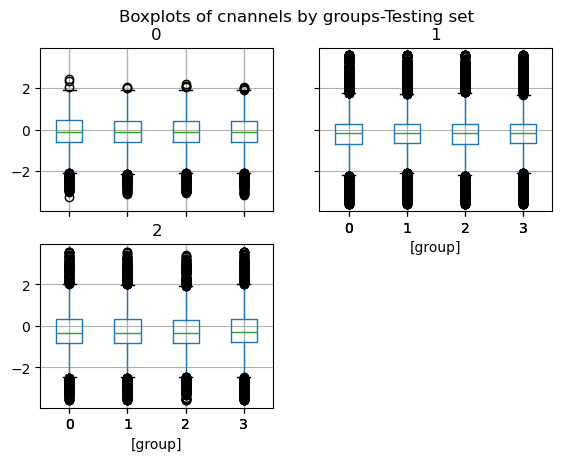

In [39]:
#Boxplots of the channels in each group of the testing dataset
tempte=pd.DataFrame(tempote)
from itertools import cycle
variables= cycle(yto)
print(variables)
tempte['group'] = [next(variables) for variable in range(len(tempte))]
#Boxplot  of features by class in testing
#tempte.boxplot(by='group')
axes = tempte.boxplot(by='group')
plt.title('')
plt.suptitle('Boxplots of cnannels by groups-Testing set')
axes = plt.show()

In [40]:
#Computing the mean of channels in each group of the testing dataset
tempte.groupby('group').mean()

,0,1,2
group,,,
0,-0.104682,-0.172664,-0.245067
1,-0.117434,-0.150093,-0.259181
2,-0.115659,-0.170807,-0.269707
3,-0.126612,-0.159061,-0.245933


In [41]:
tempoA1=Xt.reshape(Xt.shape[1],-1).T
print(tempoA1.shape)

(414, 206)


In [42]:
tempoB1=pd.DataFrame(tempoA1)
from itertools import cycle
variables= cycle(yto)
print(variables)
tempoB1['group'] = [next(variables) for variable in range(len(tempoB1))]
#Bboxplot  of features by class
a1=tempoB1.groupby('group').mean()

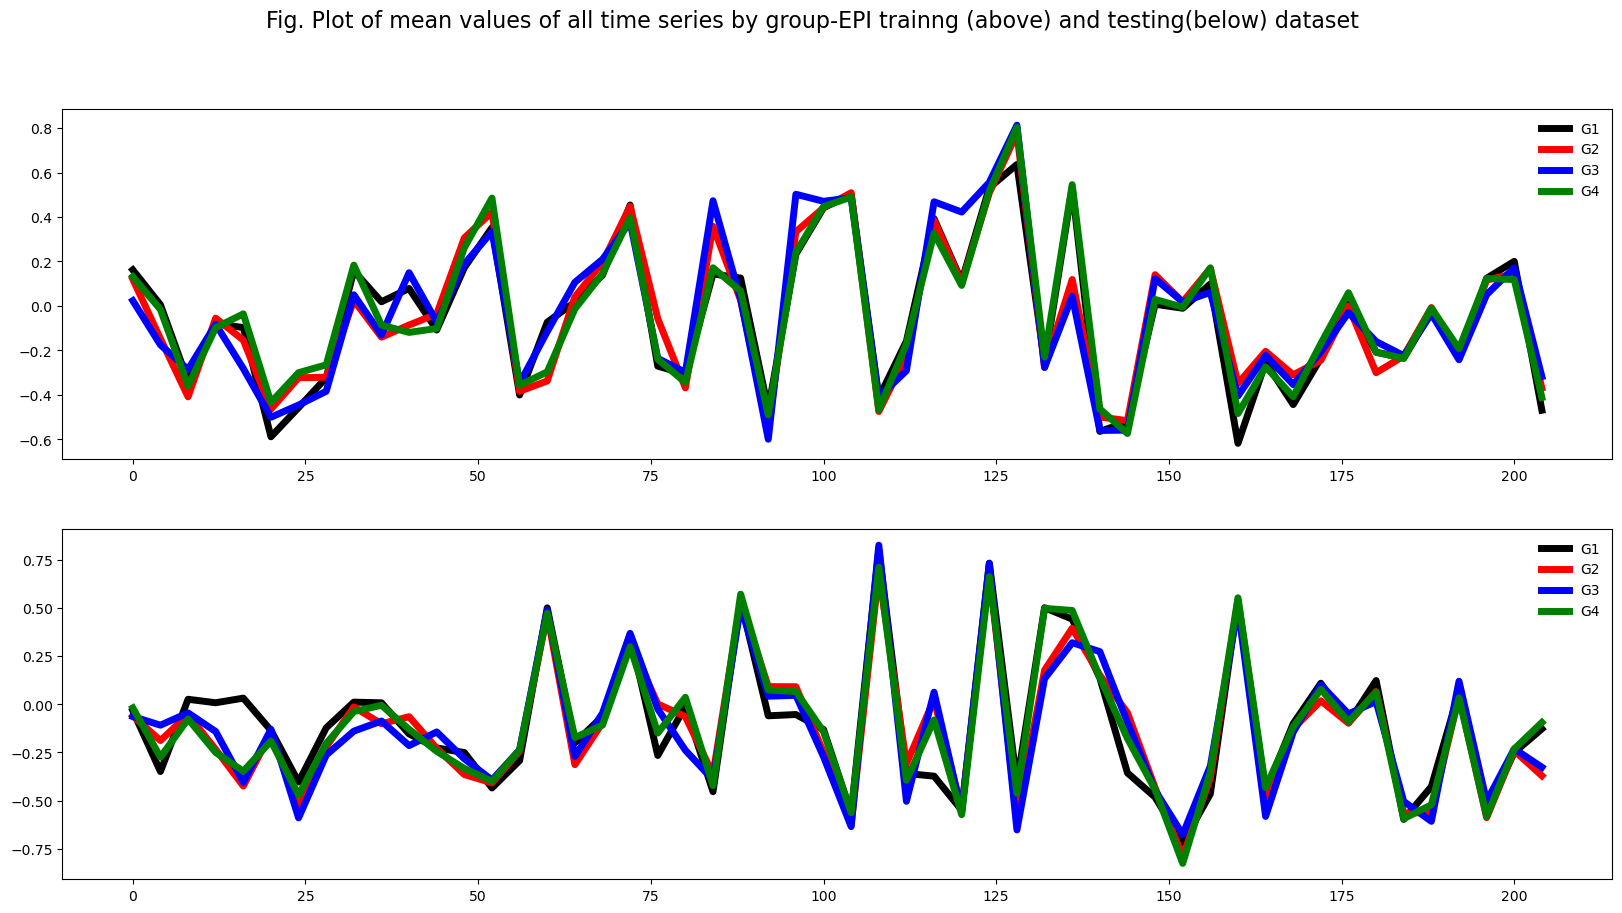

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(2,figsize=(20,10))
#fig, ax = plt.subplots(figsize=(20,10))
ejex=np.arange(0,206,4)
fig.suptitle("Fig. Plot of mean values of all time series by group-EPI trainng (above) and testing(below) dataset",fontsize=16)
ax1.plot(ejex, a.iloc[0,ejex], color='black',lw=5, label='G1')
ax1.plot(ejex,a.iloc[1,ejex], color='red', lw=5, label='G2')
ax1.plot(ejex, a.iloc[2,ejex], color='blue', lw=5, label='G3')
ax1.plot(ejex, a.iloc[3,ejex], color='green', lw=5, label='G4')
ax1.legend(loc='best', frameon=False)
ax2.plot(ejex, a1.iloc[0,ejex], color='black',lw=5, label='G1')
ax2.plot(ejex,a1.iloc[1,ejex], color='red', lw=5, label='G2')
ax2.plot(ejex, a1.iloc[2,ejex], color='blue', lw=5, label='G3')
ax2.plot(ejex, a1.iloc[3,ejex], color='green', lw=5,  label='G4')
ax2.legend(loc='best', frameon=False)
plt.show()

In [44]:
#media total testung
meanTe=tempoA1.mean(axis=0)
meanTe.shape

(206,)

### Distance Training and Testing datasets

In [45]:
from scipy.spatial import distance
dst = distance.euclidean(meanTr, meanTe)

In [46]:
dst

6.967302498593488

### Stationarity

In [48]:
#Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
Xest = tempoB.iloc[50,0:206]
result = adfuller(Xest)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.408375
p-value: 0.139387
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575


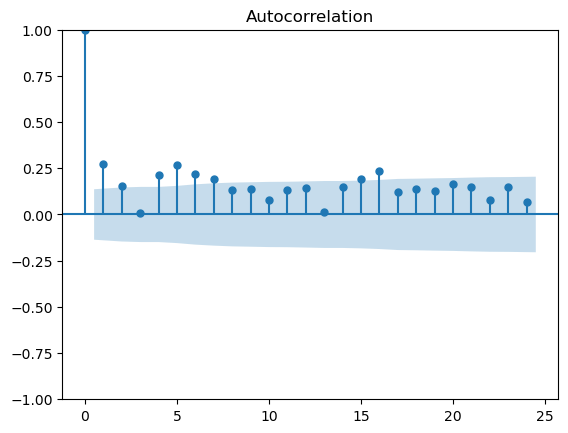

In [49]:
sm.graphics.tsa.plot_acf(Xest, alpha=.05)

In [50]:
#Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
Xest = tempoB.iloc[75,0:206]
result = adfuller(Xest)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -10.431899
p-value: 0.000000
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574


In [51]:
#Dickey-Fuller Test
from statsmodels.tsa.stattools import adfuller
Xest = tempoB.iloc[100,0:206]
result = adfuller(Xest)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.944461
p-value: 0.000000
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574


In [52]:
Xest = tempoB.iloc[40,0:206]
result = adfuller(Xest)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -12.218774
p-value: 0.000000
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574


In [53]:
Xest = tempoB.iloc[80,0:206]
result = adfuller(Xest)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.497848
p-value: 0.008043
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574


In [54]:
Xest = tempoB.iloc[60,0:206]
result = adfuller(Xest)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -13.092647
p-value: 0.000000
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574


In [55]:
Xest = tempoB.iloc[20,0:206]
result = adfuller(Xest)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
	print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.669387
p-value: 0.004565
Critical Values:
	1%: -3.463
	5%: -2.876
	10%: -2.574
